# Feed Forward Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as AccScore,mean_squared_error as MSE
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split as tts
import matplotlib.colors

## Writing Sigmoid class with mse and ce

In [2]:
class sigmoidneuron:
    
    def __init__(self):
        self.w=None
        self.b=None
        
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-(self.perceptron(x))))
    
    def grad_w_mse(self,x,y):
        y_pred=self.sigmoid(x)
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b_mse(self,x,y):
        y_pred=self.sigmoid(x)
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def grad_w_ce(self,x,y):
        y_pred=self.sigmoid(x)
        if y==0:
            return y_pred * x
        elif y==1:
            return -1 *  (1-y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")
            
    def grad_b_ce(self,x,y):
        y_pred=self.sigmoid(x)
        if y==0:
            return y_pred
        elif y==1:
            return -1 *  (1-y_pred)
        else:
            raise ValueError("y should be 0 or 1")
            
    def fit(self, X, Y, epoch=1,lr=1, initialise=True,loss_fun="mse",display_loss = False):
        
        #initialising the values of w and b
        
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
            
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epoch),total = epoch ,unit="epoch"):
            dw=0
            db=0
            for x,y in zip(X,Y):
                if loss_fun == "mse":
                    dw += self.grad_w_mse(x,y)
                    db += self.grad_b_mse(x,y)
                    
                elif loss_fun == "ce":
                    dw += self.grad_w_ce(x,y)
                    db += self.grad_b_ce(x,y)
                    
            m= X.shape[1]
            self.w -= lr * dw / m
            self.b -= lr * db / m
            
            if display_loss:
                Y_pred = self.sigmoid(X)
                if loss_fun == "mse":
                    loss[i] = MSE(Y, Y_pred)
                elif loss_fun == "ce":
                    loss[i] = log_loss(Y, Y_pred)
            
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fun == "mse":
                plt.ylabel('mean square error')
            elif  loss_fun == "ce":
                plt.ylabel('log loss')
            plt.show()
                
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred = self.sigmoid(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

making colors segment for plotting

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

Initialising random seed for regeneration of states at any time

In [4]:
np.random.seed(0)

# Generate Data

In [5]:
data , labels = make_blobs(n_samples= 1000, centers = 4 , n_features=2 ,random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


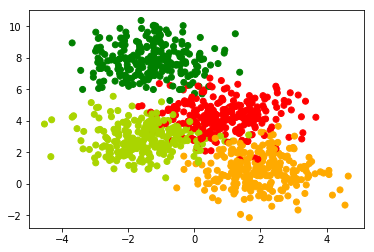

In [6]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [7]:
label_orig = labels
labels = np.mod(label_orig,2)

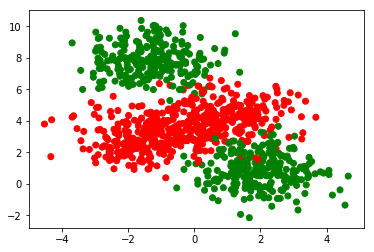

In [8]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [9]:
X_train,X_val,Y_train,Y_val = tts(data, labels, stratify = labels, random_state = 0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


## Sigmoid Neuron Classification

In [10]:
sn = sigmoidneuron()

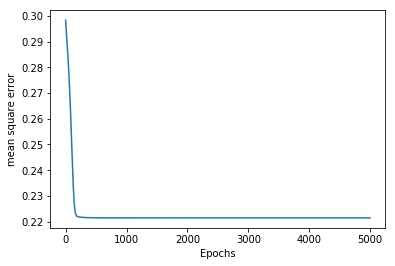

In [11]:
sn.fit(X_train,Y_train,5000,0.001,display_loss=True)

In [12]:
Y_pred_train = sn.predict(X_train)
Y_pred_val = sn.predict(X_val)
Y_pred_train_binarised = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val_binarised = (Y_pred_val >= 0.5).astype("int").ravel()
Acc_train = AccScore(Y_pred_train_binarised,Y_train)
Acc_val = AccScore(Y_pred_val_binarised,Y_val)

print(Acc_train,Acc_val)

0.6493333333333333 0.572


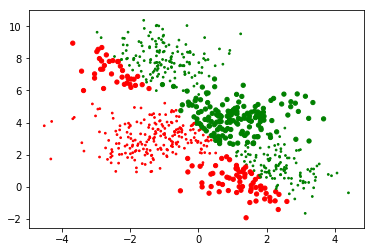

In [13]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train_binarised, cmap=my_cmap, s=15*(
    np.abs(Y_pred_train_binarised-Y_train)+.2))
plt.show()

## Writing First feed forward network

In [14]:
class feedforwardnetwork:
    
    def __init__(self):
        self.w1=None
        self.w2=None
        self.w3=None
        self.w4=None
        self.w5=None
        self.w6=None
        self.b1=None
        self.b2=None
        self.b3=None
        
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def forward_pass(self,x):
        self.x1,self.x2= x  # x contains array of two features which is assigned to x1 & x2
        # First sigmoid neuron
        self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        # second sigmoid neuron
        self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        # Third sigmoid neuron taking i/p as o/p of first two sigmoid
        self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    
    # This function of grad is abstract to me .This is directly copy pasted for now.
    # it will be thought in next sessions.
    
    def grad(self, x, y):
        self.forward_pass(x)
    
        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
        
        
    # Here for now we also don't know why we haven't writen different fun for grad_w and grad_b
    
    def fit(self,X,Y,epoch=1,lr=1,initialise=True,display_loss=True):
        
        #Initialising value of w and b
        if initialise:
            self.w1=np.random.randn()
            self.w2=np.random.randn()
            self.w3=np.random.randn()
            self.w4=np.random.randn()
            self.w5=np.random.randn()
            self.w6=np.random.randn()
            self.b1=0
            self.b2=0
            self.b3=0
            
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epoch) , unit = 'epoch' , total = epoch):
            # Initialising all in one line by 0
            dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0] * 9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            
            # Now assigning final values to w and b for prediction function to be used
            
            m=X.shape[1]
            self.w1 -= dw1 * lr / m
            self.w2 -= dw2 * lr / m
            self.w3 -= dw3 * lr / m
            self.w4 -= dw4 * lr / m
            self.w5 -= dw5 * lr / m
            self.w6 -= dw6 * lr / m
            self.b1 -= db1 * lr / m
            self.b2 -= db2 * lr / m
            self.b3 -= db3 * lr / m
            
            if  display_loss:
                Y_pred = self.predict(X)
                loss[i]=MSE(Y_pred,Y)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epoch')
            plt.ylabel('Mean squared Error')
            plt.show()
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

## Feed forward network classification

In [15]:
ffn = feedforwardnetwork()

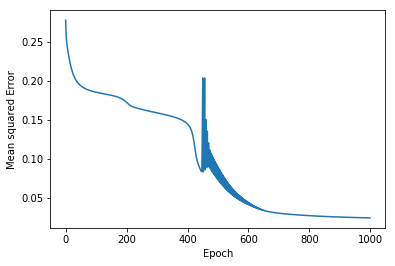

In [16]:
ffn.fit(X_train,Y_train,1000,0.01)

In [17]:
Y_pred_train = ffn.predict(X_train)
Y_pred_train_binarised = (Y_pred_train >= 0.5).astype('int').ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_val_binarised = (Y_pred_val >= 0.5).astype('int').ravel()

train_accuracy = AccScore(Y_pred_train_binarised,Y_train)
val_accuracy = AccScore(Y_pred_val_binarised,Y_val)

print(train_accuracy,val_accuracy)

0.976 0.94


Now plotting 4 features  in 2D plot by using scatterplot

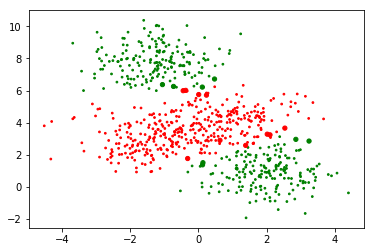

In [18]:
plt.scatter(X_train[:,0],X_train[:,1], c=Y_pred_train_binarised,cmap=my_cmap,s=15*(np.abs(
    Y_pred_train_binarised-Y_train)+ .2))
plt.show()

# Feed forward Generic Class - For binary O/P

In [19]:
class feedforwardnetworkgeneric:
    
    def __init__(self,n_input,hidden_sizes=[2]):
        self.nx=n_input
        self.ny=1
        self.nh=len(hidden_sizes)
        self.sizes=[self.nx] + hidden_sizes + [self.ny] # concatinate the list
        
        self.W={} # Initialising weights
        self.B={} # Initialising bias
        for i in range(self.nh +1):
            self.W[i+1]=np.random.randn(self.sizes[i],self.sizes[i+1])
            self.B[i+1]=np.zeros((1,self.sizes[i+1]))
            
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def forward_pass(self,x):
        self.A = {}   # Initialising preactivation as dictionary
        self.H = {}   # Initialising post activation as dictionary
        self.H[0]=x.reshape(1,-1)
        for i in range(self.nh +1):
            self.A[i+1] = np.matmul(self.H[i],self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]
    
    # Grad and grad_sigmoid fun is unknown for now
    
    def grad_sigmoid(sellf,x):
        return x * (1-x)
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L]-y)
        for k in range(L,0,-1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
            
    def fit(self,X,Y,epoch=1,lr=1,initialise=True,display_loss=True):
        
        if initialise:
            for i in range(self.nh + 1):
                self.W[i+1]=np.random.randn(self.sizes[i],self.sizes[i+1])
                self.B[i+1]=np.zeros((1,self.sizes[i+1]))
                
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epoch),total=epoch,unit = 'epoch'):
            dW = {}
            dB = {}
            
            for j in range(self.nh + 1):
                dW[j+1]=np.zeros((self.sizes[j],self.sizes[j+1]))
                dB[j+1]=np.zeros((1,self.sizes[j+1]))
                
            for x,y in zip(X,Y):
                self.grad(x,y)
                for j in range(self.nh + 1):
                    dW[j+1] += self.dW[j+1]
                    dB[j+1] += self.dB[j+1]
                    
            m = X.shape[1]
            for j in range(self.nh + 1):
                self.W[j+1] -= dW[j+1] * lr / m
                self.B[j+1] -= dB[j+1] * lr / m
                
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = MSE(Y_pred,Y)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show()
            
    def  predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze() #here squeeze reduces or removes the dimension of len 1.

In [20]:
ffs = feedforwardnetworkgeneric(2,[2,3])

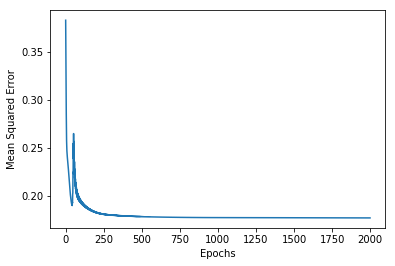

In [21]:
ffs.fit(X_train,Y_train,2000,0.01)

In [22]:
Y_pred_train = ffs.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffs.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = AccScore(Y_pred_binarised_train, Y_train)
accuracy_val = AccScore(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.71


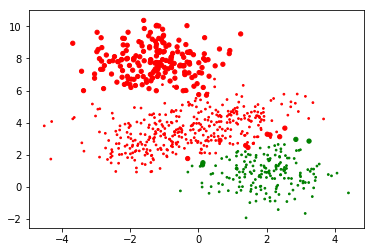

In [23]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

# Multiclass classification FFN_Generic

In [24]:
class FFNMG:
    
    def __init__(self,n_inputs,n_outputs,hidden_sizes=[3]):
        self.nx=n_inputs
        self.ny=n_outputs
        self.nh=len(hidden_sizes)
        self.sizes=[self.nx] + hidden_sizes + [self.ny]
        
        self.w={}
        self.b={}
        for i in range(self.nh + 1):
            self.w[i+1]=np.random.randn(self.sizes[i],self.sizes[i+1])
            self.b[i+1]=np.zeros((1,self.sizes[i+1]))
        
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def softmax(self,x):
        exps=np.exp(x)      # Bradcasting will be done and list of size x will be created which contains exp of all values
        return exps / np.sum(exps)  #Make probability distribution of exps list
    
    def forward_pass(self,x):
        self.A={}
        self.H={}
        self.H[0]=x.reshape(1,-1)
        for i in range(self.nh):
            self.A[i+1]=np.matmul(self.H[i],self.w[i+1]) + self.b[i+1]
            self.H[i+1]=self.sigmoid(self.A[i+1])
        self.A[self.nh+1]=np.matmul(self.H[self.nh],self.w[self.nh+1]) + self.b[self.nh+1]
        self.H[self.nh+1]=self.softmax(self.A[self.nh+1])
        return self.H[self.nh+1]
    
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()  #Squeeze is bit unclear to me for now
    
    def grad_sigmoid(self,x):
        return x*(1-x)
    
    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl= -np.log(yl)
        yl= np.mean(yl)
        return yl
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dW={}
        self.dB={}
        self.dH={}
        self.dA={}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L,0,-1):
            self.dW[k]=np.matmul(self.H[k-1].T,self.dA[k])
            self.dB[k]=self.dA[k]
            self.dH[k-1]= np.matmul(self.dA[k],self.w[k].T)
            self.dA[k-1]= np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
            
    def fit(self,X,Y,epoch=100,init=True,lr=0.01,display_loss=False):
        
        if display_loss:
            loss = {}
            
        if init:
            for i in range(self.nh + 1):
                self.w[i+1]=np.random.randn(self.sizes[i],self.sizes[i+1])
                self.b[i+1]=np.zeros((1,self.sizes[i+1]))
        
        for epoch in tqdm_notebook(range(epoch),total=epoch, unit="Epochs"):
            dW = {}
            dB = {}
            for i in range(self.nh + 1):
                dW[i+1]= np.zeros((self.sizes[i],self.sizes[i+1]))
                dB[i+1]= np.zeros((1,self.sizes[i+1]))
            for x,y in zip(X,Y):
                self.grad(x,y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
                    
            m= X.shape[1]
            for i in range(self.nh + 1):
                self.w[i+1] -= lr* (dW[i+1]/m)
                self.b[i+1] -= lr* (dB[i+1]/m)
                
            if display_loss:
                Y_pred = self.predict(X)
                loss[epoch] = self.cross_entropy(Y,Y_pred)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('CE')
            plt.show()
                

In [25]:
X_train, X_val, Y_train, Y_val = tts(data, label_orig, stratify=label_orig, random_state=0)
print(X_train.shape, X_val.shape,Y_train.shape,Y_val.shape, label_orig.shape)

(750, 2) (250, 2) (750,) (250,) (1000,)


In [26]:
enc = OneHotEncoder()
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
y_OH_train.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

(750, 4)

In [27]:
ffsn_mult=FFNMG(2,4,[2,3])

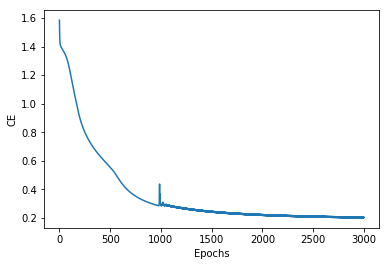

In [34]:
ffsn_mult.fit(X_train,y_OH_train,3000,display_loss=True,lr=0.001)

In [35]:
Y_pred_train = ffsn_mult.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_mult.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = AccScore(Y_pred_train, Y_train)
accuracy_val = AccScore(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.92
Validation accuracy 0.93


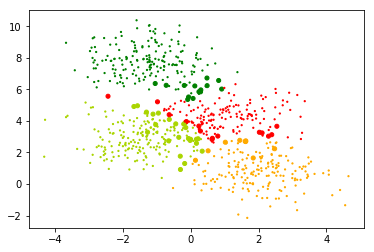

In [36]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()